In [1]:
## Based on https://machinelearningmastery.com/lstm-autoencoders/

In [2]:
# Import
from numpy import array

In [3]:
# define input sequence
sequence = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# reshape input into [samples, timesteps, features]
n_in = len(sequence)
sequence = sequence.reshape((1, n_in, 1))

In [4]:
print (sequence.shape, sequence)

(1, 9, 1) [[[0.1]
  [0.2]
  [0.3]
  [0.4]
  [0.5]
  [0.6]
  [0.7]
  [0.8]
  [0.9]]]


In [5]:
## Install if not already done
# !pip install keras
# !pip install tensorflow

In [6]:
# Import for keras
import tensorflow
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model

In [7]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_in,1)))
model.add(RepeatVector(n_in))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')


In [8]:
# fit model
model.fit(sequence, sequence, epochs=300, verbose=0)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
repeat_vector (RepeatVector) (None, 9, 100)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 9, 100)            80400     
_________________________________________________________________
time_distributed (TimeDistri (None, 9, 1)              101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [9]:
# demonstrate recreation
yhat = model.predict(sequence, verbose=0)
print(yhat[0,:,0])

[0.10671981 0.20337036 0.3011316  0.39972422 0.49911445 0.5989836
 0.6991449  0.79964757 0.90071493]


In [10]:
## Installations for plotting
!pip install pydot_ng
!pip install graphviz

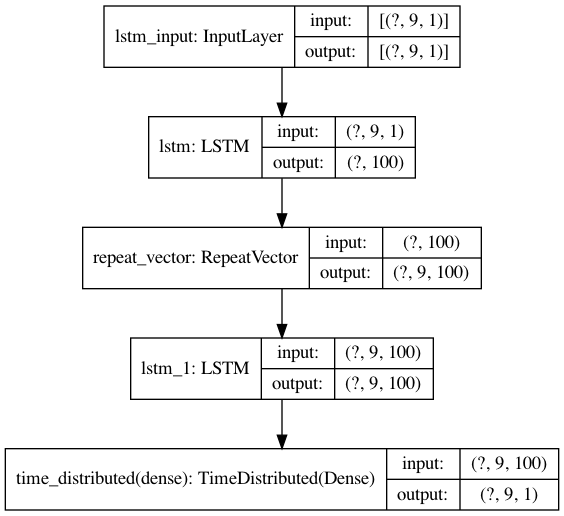

In [11]:
plot_model(model, show_shapes=True, to_file='data/reconstruct_lstm_autoencoder.png')

## Now Predicting Next Number in Sequence

In [12]:
# define input sequence
seq_in = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# reshape input into [samples, timesteps, features]
n_in = len(seq_in)
seq_in = seq_in.reshape((1, n_in, 1))
# prepare output sequence
seq_out = seq_in[:, 1:, :]
n_out = n_in - 1

In [13]:
print (seq_out.shape, seq_out)

(1, 8, 1) [[[0.2]
  [0.3]
  [0.4]
  [0.5]
  [0.6]
  [0.7]
  [0.8]
  [0.9]]]


In [17]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_in,1)))
# Notice output dimension used with REPEAT
model.add(RepeatVector(n_out))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

In [18]:
# fit model
model.fit(seq_in, seq_out, epochs=300, verbose=0)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               40800     
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 8, 100)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 8, 100)            80400     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 8, 1)              101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Show output
yhat = model.predict(seq_in, verbose=0)
print(yhat[0,:,0])

[0.16532792 0.28862038 0.40267077 0.5094477  0.61048245 0.7069948
 0.7999822  0.8902847 ]


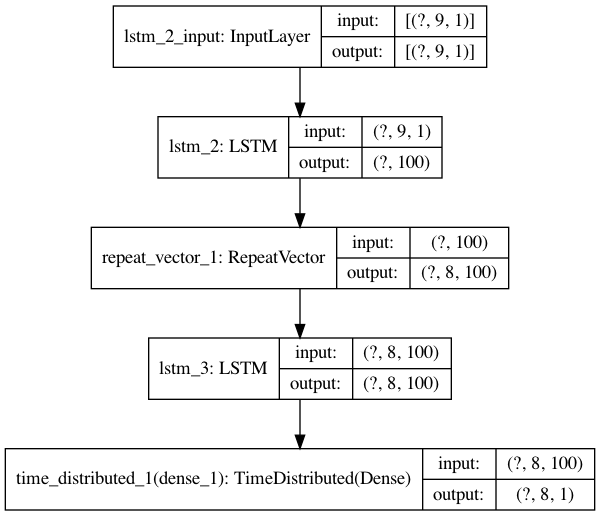

In [20]:
plot_model(model, show_shapes=True, to_file='data/reconstruct_lstm_nextnum.png')